In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


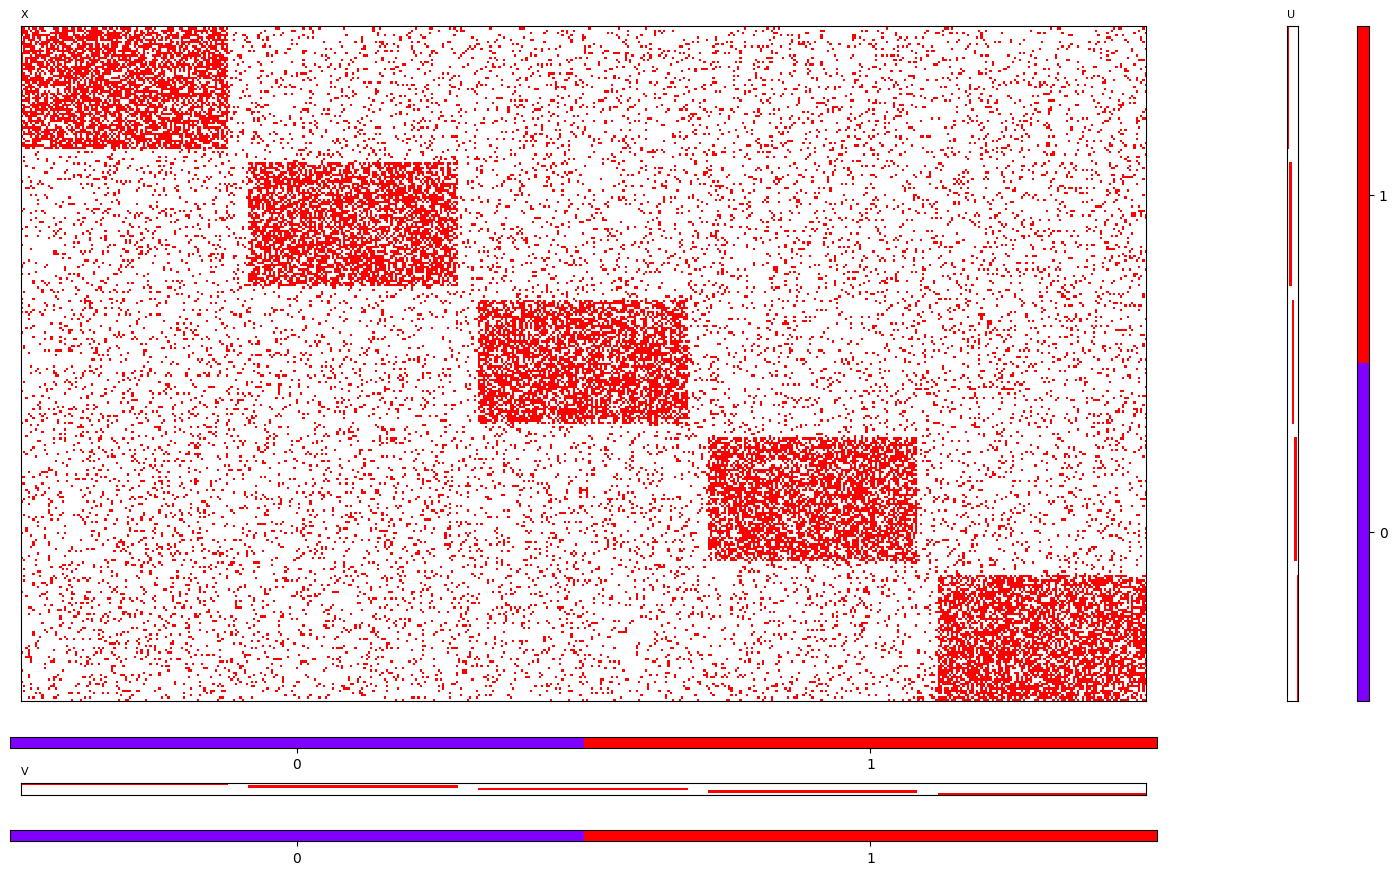

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[-0.1, -0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [24]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 20195
[I]   val_size     : 2886
[I]   test_size    : 5771
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 121148
[I]   n_negatives  : 28852
[I]   train_size   : 20195
[I]   val_size     : 2886
[I]   test_size    : 5771
[I]   seed         : 2023


In [25]:
# shared params
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 5

# Init with `NMFSklearn`

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : mu
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.
[W] Timer not started.
[I] model saved as: 24-07-07_19-23-29_NMFSklearn.pickle


c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\sklearn\decomposition\_nmf.py:1610: UserWarning: The multiplicative update ('mu') solver cannot update zeros present in the initialization, and so leads to poorer results when used jointly with init='nndsvd'. You may try init='nndsvda' or init='nndsvdar' instead.
  warnings.warn(


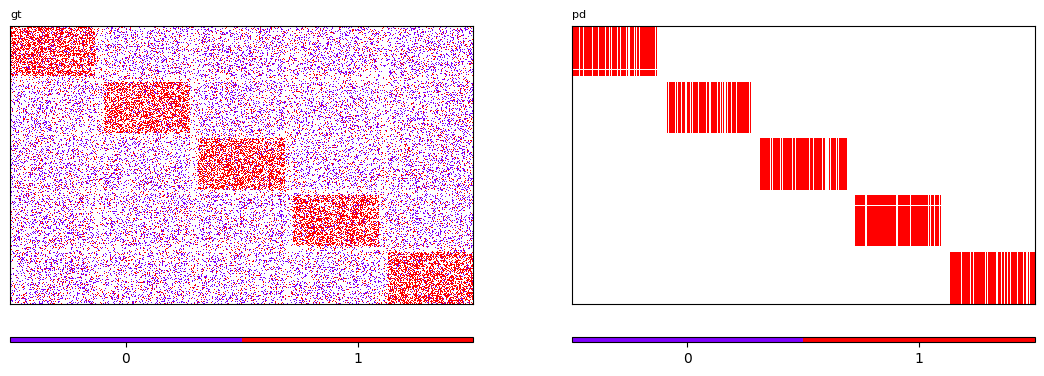

<Figure size 640x480 with 0 Axes>

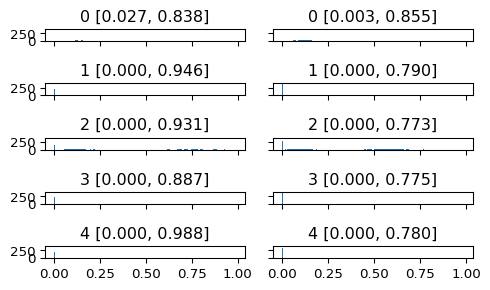

In [26]:
from models import NMFSklearn

model_nmf = NMFSklearn(k=k, solver='mu', init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U.copy(), model_nmf.V.copy()

from utils import show_factor_distribution

show_factor_distribution(U=model_nmf.U, V=model_nmf.V, resolution=100)

# `BinaryMFThresholdExColumnwise` (Wolfe line search)

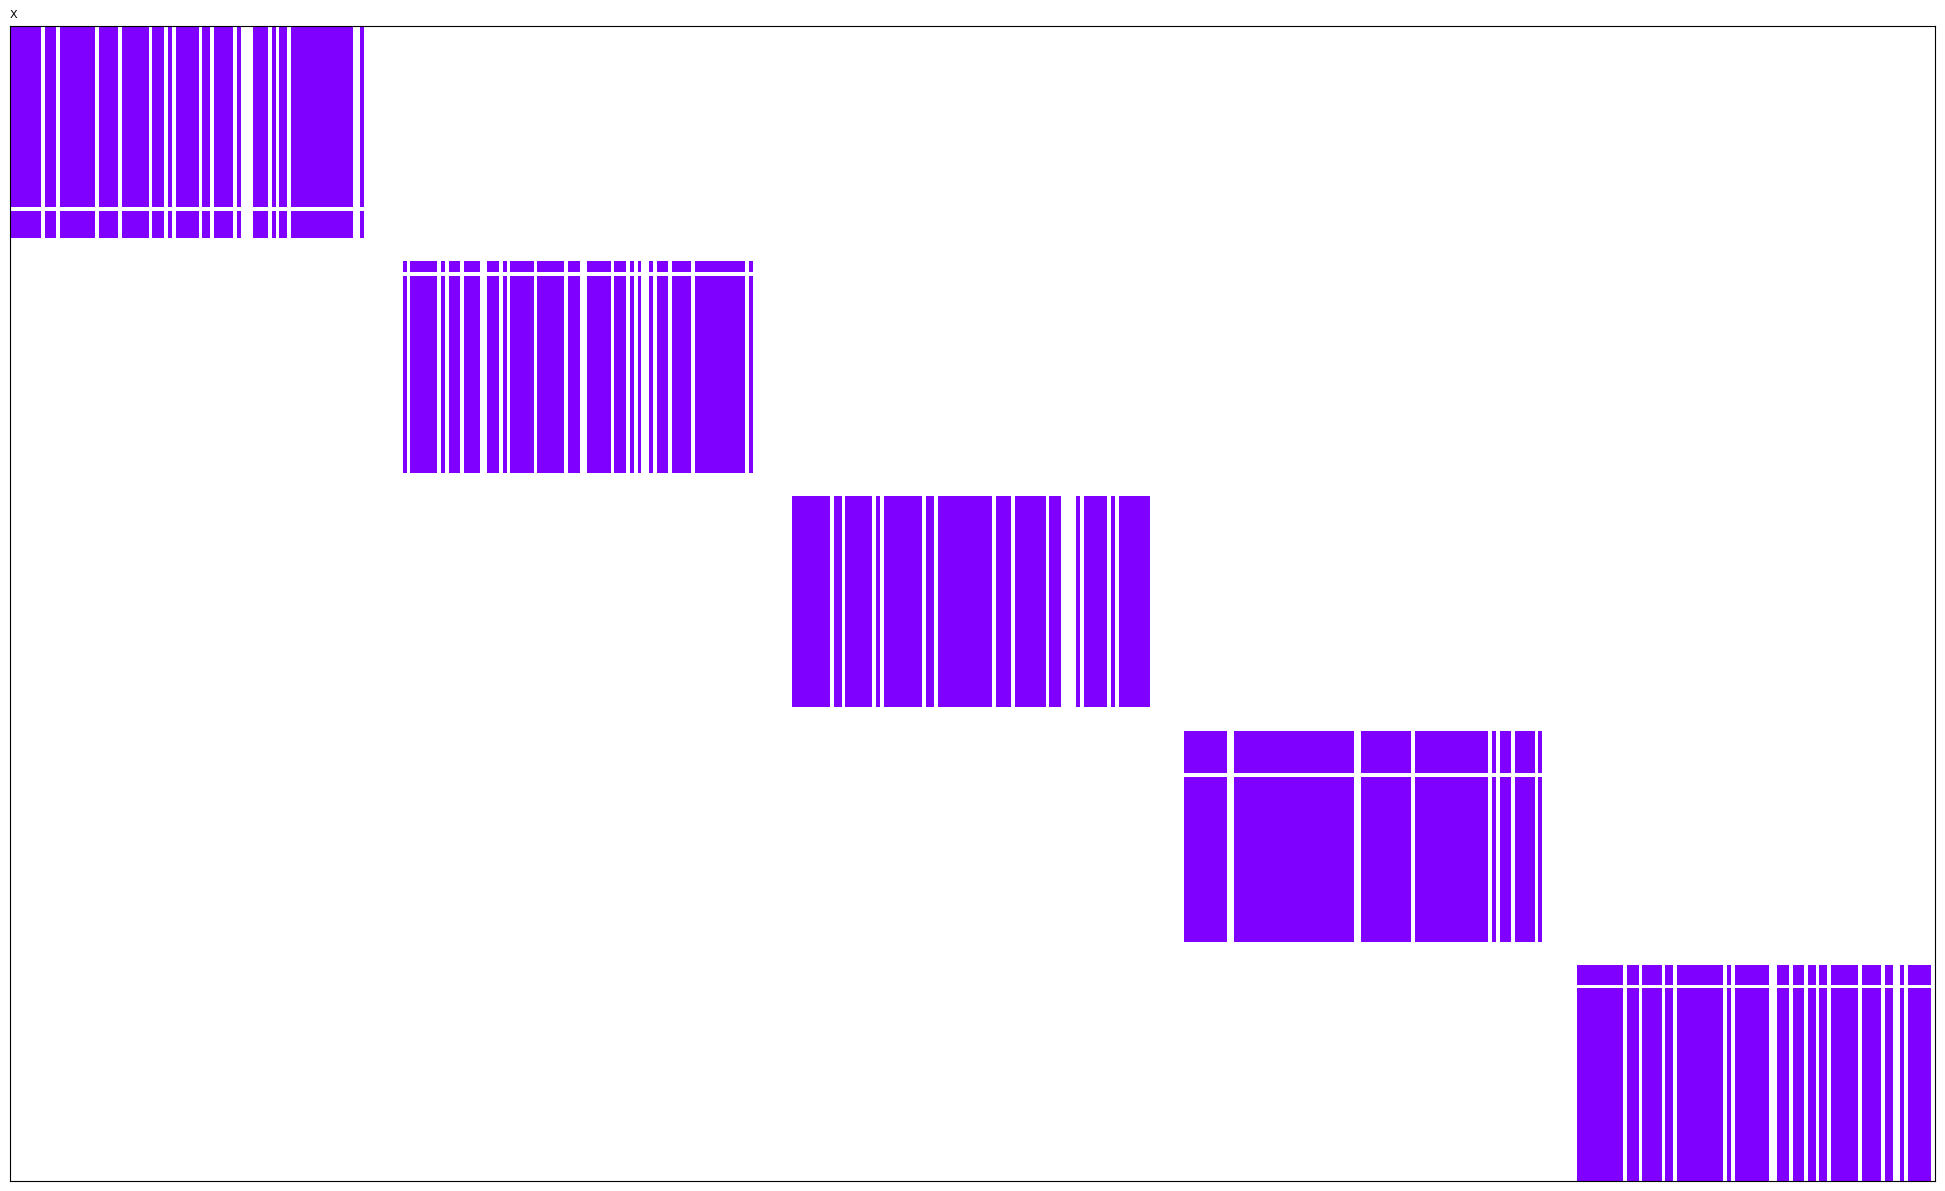

<Figure size 640x480 with 0 Axes>

In [28]:
from utils import add

U, V = model_nmf.U.copy(), model_nmf.V.copy()

# U = add(U, -0.4)
# V = add(V, -0.4)

U[U < 0] = 0
V[V < 0] = 0

from utils import show_matrix, binarize, matmul

U_bool = binarize(U, 0.5)
V_bool = binarize(V, 0.5)
X_bool = matmul(U_bool, V_bool.T, boolean=True, sparse=True)

show_matrix([(X_bool, [0, 0], 'X')])

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] us           : 0.5
[I] vs           : 0.5
[I] lamda        : 5
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : custom
[I] solver       : line-search
[I] seed         : 1720351452
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 0.9880173377763039] -> [0.0, 0.9999999999999999], V: [0.0, 0.8549242148591285] -> [0.0, 1.0]


[I] F: 7355.4126: : 101it [00:15,  6.32it/s]                       


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-07_19-24-28_BinaryMFThresholdExColumnwise.pickle


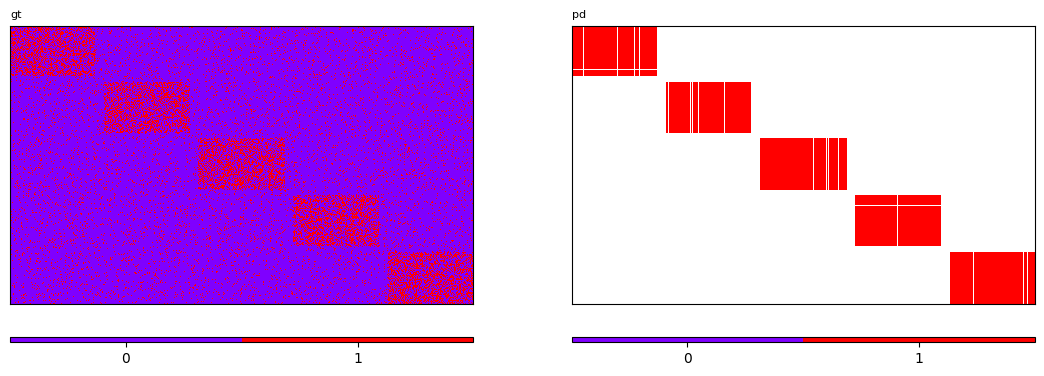

\
                              
                  time iter   
0    07/07/24 07:24:12    0   
1    07/07/24 07:24:12    1   
2    07/07/24 07:24:12    2   
3    07/07/24 07:24:12    3   
4    07/07/24 07:24:12    4   
5    07/07/24 07:24:13    5   
6    07/07/24 07:24:13    6   
7    07/07/24 07:24:13    7   
8    07/07/24 07:24:13    8   
9    07/07/24 07:24:13    9   
10   07/07/24 07:24:13   10   
11   07/07/24 07:24:13   11   
12   07/07/24 07:24:14   12   
13   07/07/24 07:24:14   13   
14   07/07/24 07:24:14   14   
15   07/07/24 07:24:14   15   
16   07/07/24 07:24:14   16   
17   07/07/24 07:24:14   17   
18   07/07/24 07:24:15   18   
19   07/07/24 07:24:15   19   
20   07/07/24 07:24:15   20   
21   07/07/24 07:24:15   21   
22   07/07/24 07:24:15   22   
23   07/07/24 07:24:15   23   
24   07/07/24 07:24:15   24   
25   07/07/24 07:24:16   25   
26   07/07/24 07:24:16   26   
27   07/07/24 07:24:16   27   
28   07/07/24 07:24:16   28   
29   07/07/24 07:24:16   29   
30   07/07/24 07:24:16   30   
31   07/07/24 07:24:17   31   
32   07/07/24 07:24:17   32   
33   07/07/24 07:24:17   33   
34   07/07/24 07:24:17   34   
35   07/07/24 07:24:17   35   
36   07/07/24 07:24:17   36   
37   07/07/24 07:24:17   37   
38   07/07/24 07:24:18   38   
39   07/07/24 07:24:18   39   
40   07/07/24 07:24:18   40   
41   07/07/24 07:24:18   41   
42   07/07/24 07:24:18   42   
43   07/07/24 07:24:18   43   
44   07/07/24 07:24:19   44   
45   07/07/24 07:24:19   45   
46   07/07/24 07:24:19   46   
47   07/07/24 07:24:19   47   
48   07/07/24 07:24:19   48   
49   07/07/24 07:24:19   49   
50   07/07/24 07:24:20   50   
51   07/07/24 07:24:20   51   
52   07/07/24 07:24:20   52   
53   07/07/24 07:24:20   53   
54   07/07/24 07:24:20   54   
55   07/07/24 07:24:20   55   
56   07/07/24 07:24:20   56   
57   07/07/24 07:24:21   57   
58   07/07/24 07:24:21   58   
59   07/07/24 07:24:21   59   
60   07/07/24 07:24:21   60   
61   07/07/24 07:24:21   61   
62   07/07/24 07:24:21   62   
63   07/07/24 07:24:22   63   
64   07/07/24 07:24:22   64   
65   07/07/24 07:24:22   65   
66   07/07/24 07:24:22   66   
67   07/07/24 07:24:22   67   
68   07/07/24 07:24:22   68   
69   07/07/24 07:24:23   69   
70   07/07/24 07:24:23   70   
71   07/07/24 07:24:23   71   
72   07/07/24 07:24:23   72   
73   07/07/24 07:24:23   73   
74   07/07/24 07:24:23   74   
75   07/07/24 07:24:24   75   
76   07/07/24 07:24:24   76   
77   07/07/24 07:24:24   77   
78   07/07/24 07:24:24   78   
79   07/07/24 07:24:24   79   
80   07/07/24 07:24:24   80   
81   07/07/24 07:24:25   81   
82   07/07/24 07:24:25   82   
83   07/07/24 07:24:25   83   
84   07/07/24 07:24:25   84   
85   07/07/24 07:24:25   85   
86   07/07/24 07:24:25   86   
87   07/07/24 07:24:26   87   
88   07/07/24 07:24:26   88   
89   07/07/24 07:24:26   89   
90   07/07/24 07:24:26   90   
91   07/07/24 07:24:26   91   
92   07/07/24 07:24:26   92   
93   07/07/24 07:24:27   93   
94   07/07/24 07:24:27   94   
95   07/07/24 07:24:27   95   
96   07/07/24 07:24:27   96   
97   07/07/24 07:24:27   97   
98   07/07/24 07:24:27   98   
99   07/07/24 07:24:28   99   
100  07/07/24 07:24:28  100   
101  07/07/24 07:24:28  101   

                                                        \
                                                         
                                                    us   
0                            [0.5, 0.5, 0.5, 0.5, 0.5]   
1    [0.99999, 0.8447514588480253, 0.89570508018559...   
2    [0.8405713766946906, 0.8034883676662135, 0.807...   
3    [0.8453095106036455, 0.8132259889524195, 0.823...   
4    [0.8439554411371909, 0.8090520655477146, 0.818...   
5    [0.849298057626294, 0.8011851573486252, 0.8115...   
6    [0.845239702644883, 0.7925327421848543, 0.8004...   
7    [0.8512494647413434, 0.7862396350441311, 0.795...   
8    [0.8464759965410813, 0.7762214940772206, 0.783...   
9    [0.8601850446639623, 0.7522408153096832, 0.762...   
10   [0.84739298954

<Figure size 640x480 with 0 Axes>

In [29]:
from models import BinaryMFThresholdExColumnwise

us, vs = 0.5, 0.5
W = 'full'
init_method = 'custom'
min_diff = 0.0
max_iter = 100
lamda = 5

model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, us=us, vs=vs, W=W, lamda=lamda, min_diff=min_diff, max_iter=max_iter, init_method=init_method)
model.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

# `BinaryMFThreshold`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.5
[I] v            : 0.5
[I] lamda        : 10
[I] solver       : line-search
[I] min_diff     : 0.001
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 1720351525
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 0.9880173377763039] -> [0.0, 0.9999999999999999], V: [0.0, 0.8549242148591285] -> [0.0, 1.0]
[I] iter: 1, start: [0.500, 0.500], direction: [4800.726, 6387.209]
[I]     Wolfe line search iter       : 1
[I]     num of function evals        : 19
[I]     num of gradient evals        : 3
[I]     function value update        : 8382.569 -> 7753.337
[I]     threshold update             : [0.500, 0.500] -> [0.647, 0.695]
[I]     threshold update direction   : [0.147, 0.195]
[I]     threshold difference         :

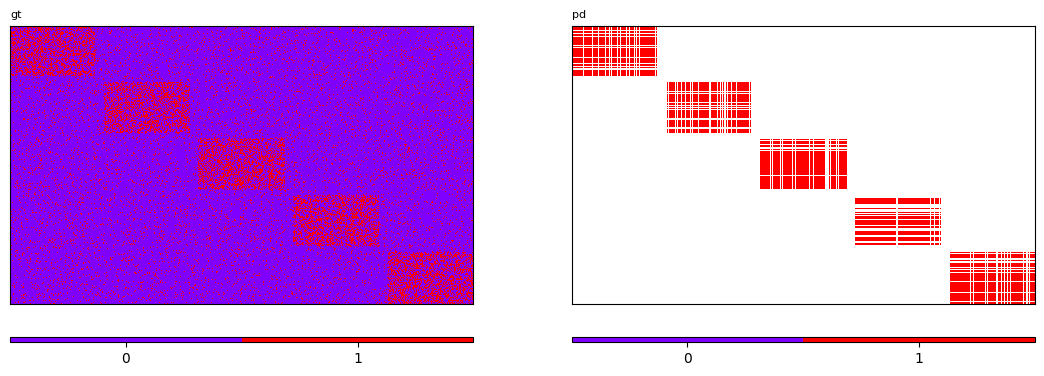

train  \
                                                                    0   
                 time iter         u         v            F    Recall   
0   07/07/24 07:25:25    0  0.500000  0.500000  8382.568820  0.540480   
1   07/07/24 07:25:26    1  0.646507  0.694922  7753.336958  0.259916   
2   07/07/24 07:25:26    2  0.612118  0.633837  7574.905846  0.378311   
3   07/07/24 07:25:26    3  0.624166  0.603124  7567.888188  0.417529   
4   07/07/24 07:25:26    4  0.636156  0.609007  7561.450704  0.402228   
5   07/07/24 07:25:26    5  0.684096  0.558058  7556.012354  0.364694   
6   07/07/24 07:25:26    6  0.678038  0.555689  7554.695147  0.386531   
7   07/07/24 07:25:27    7  0.677631  0.560242  7554.533020  0.381827   
8   07/07/24 07:25:27    8  0.673949  0.559765  7554.485697  0.388710   
9   07/07/24 07:25:27    9  0.675214  0.561374  7554.343207  0.382966   
10  07/07/24 07:25:27   10  0.667892  0.568723  7554.276717  0.390790   
11  07/07/24 07:25:27   11  0.669602  0.569822  7554.149480  0.382322   
12  07/07/24 07:25:27   12  0.669468  0.569573  7554.149108  0.383016   

                                  
                                  
   Precision  Accuracy        F1  
0   0.451275  0.849653  0.491866  
1   0.518471  0.867860  0.346252  
2   0.490183  0.863327  0.427042  
3   0.481306  0.861000  0.447155  
4   0.485100  0.862040  0.439794  
5   0.486331  0.862607  0.416820  
6   0.483344  0.861780  0.429550  
7   0.484816  0.862147  0.427202  
8   0.483315  0.861753  0.430881  
9   0.484829  0.862140  0.427919  
10  0.484439  0.861987  0.432604  
11  0.485934  0.862387  0.427946  
12  0.485836  0.862360  0.428342

<Figure size 640x480 with 0 Axes>

: 

In [31]:
from models import BinaryMFThreshold

u, v = 0.5, 0.5
W = 'full'

task = 'reconstruction'
init_method = 'custom'
lamda = 10

model = BinaryMFThreshold(k=k, U=U, V=V, W=W, u=u, v=v, lamda=lamda, init_method=init_method)
model.fit(X_train=X_train, task=task, verbose=True, display=False)

# `BinaryMFThresholdExColumnwise` (coordinate descent)

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] us           : 0.1
[I] vs           : 0.1
[I] lamda        : 10
[I] min_diff     : 0.0
[I] max_iter     : 1000
[I] init_method  : custom
[I] solver       : cd
[I] seed         : 1720350056
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] Missing validation data.
[W] Missing testing data.
[I] Normalized U: [0.0, 0.9880173377763039] -> [0.0, 0.9999999999999999], V: [0.0, 0.8549242148591285] -> [0.0, 1.0]


[I] F: 13711.7012: : 1001it [00:42, 23.66it/s]                        


[W] Stopped in advance: Reach maximum iteration
[W] Timer not started.
[I] model saved as: 24-07-07_19-01-40_BinaryMFThresholdExColumnwise.pickle


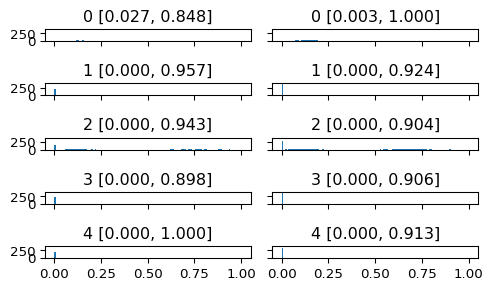

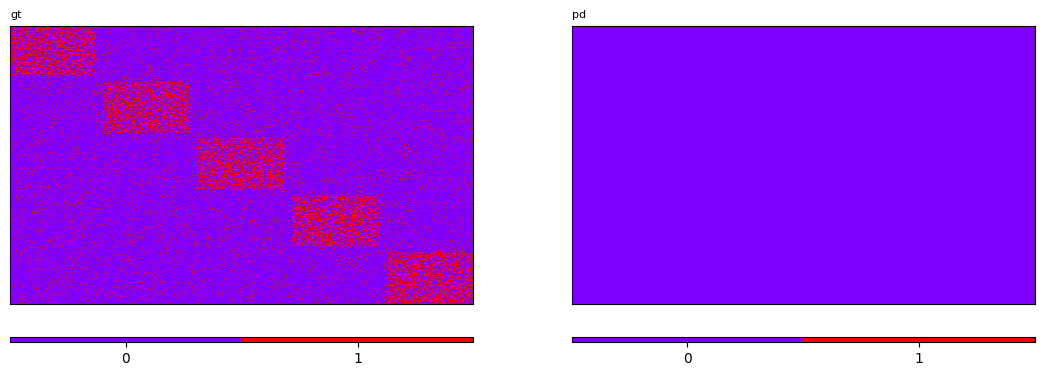

\
                                
                   time  iter   
0     07/07/24 07:00:57     1   
1     07/07/24 07:00:57     2   
2     07/07/24 07:00:57     3   
3     07/07/24 07:00:57     4   
4     07/07/24 07:00:57     5   
5     07/07/24 07:00:57     6   
6     07/07/24 07:00:58     7   
7     07/07/24 07:00:58     8   
8     07/07/24 07:00:58     9   
9     07/07/24 07:00:58    10   
10    07/07/24 07:00:58    11   
11    07/07/24 07:00:58    12   
12    07/07/24 07:00:58    13   
13    07/07/24 07:00:58    14   
14    07/07/24 07:00:58    15   
15    07/07/24 07:00:58    16   
16    07/07/24 07:00:58    17   
17    07/07/24 07:00:58    18   
18    07/07/24 07:00:58    19   
19    07/07/24 07:00:58    20   
20    07/07/24 07:00:58    21   
21    07/07/24 07:00:58    22   
22    07/07/24 07:00:58    23   
23    07/07/24 07:00:58    24   
24    07/07/24 07:00:58    25   
25    07/07/24 07:00:58    26   
26    07/07/24 07:00:58    27   
27    07/07/24 07:00:58    28   
28    07/07/24 07:00:58    29   
29    07/07/24 07:00:58    30   
30    07/07/24 07:00:59    31   
31    07/07/24 07:00:59    32   
32    07/07/24 07:00:59    33   
33    07/07/24 07:00:59    34   
34    07/07/24 07:00:59    35   
35    07/07/24 07:00:59    36   
36    07/07/24 07:00:59    37   
37    07/07/24 07:00:59    38   
38    07/07/24 07:00:59    39   
39    07/07/24 07:00:59    40   
40    07/07/24 07:00:59    41   
41    07/07/24 07:00:59    42   
42    07/07/24 07:00:59    43   
43    07/07/24 07:00:59    44   
44    07/07/24 07:00:59    45   
45    07/07/24 07:00:59    46   
46    07/07/24 07:00:59    47   
47    07/07/24 07:00:59    48   
48    07/07/24 07:00:59    49   
49    07/07/24 07:00:59    50   
50    07/07/24 07:00:59    51   
51    07/07/24 07:00:59    52   
52    07/07/24 07:00:59    53   
53    07/07/24 07:01:00    54   
54    07/07/24 07:01:00    55   
55    07/07/24 07:01:00    56   
56    07/07/24 07:01:00    57   
57    07/07/24 07:01:00    58   
58    07/07/24 07:01:00    59   
59    07/07/24 07:01:00    60   
60    07/07/24 07:01:00    61   
61    07/07/24 07:01:00    62   
62    07/07/24 07:01:00    63   
63    07/07/24 07:01:00    64   
64    07/07/24 07:01:00    65   
65    07/07/24 07:01:00    66   
66    07/07/24 07:01:00    67   
67    07/07/24 07:01:00    68   
68    07/07/24 07:01:00    69   
69    07/07/24 07:01:00    70   
70    07/07/24 07:01:00    71   
71    07/07/24 07:01:00    72   
72    07/07/24 07:01:00    73   
73    07/07/24 07:01:00    74   
74    07/07/24 07:01:00    75   
75    07/07/24 07:01:00    76   
76    07/07/24 07:01:01    77   
77    07/07/24 07:01:01    78   
78    07/07/24 07:01:01    79   
79    07/07/24 07:01:01    80   
80    07/07/24 07:01:01    81   
81    07/07/24 07:01:01    82   
82    07/07/24 07:01:01    83   
83    07/07/24 07:01:01    84   
84    07/07/24 07:01:01    85   
85    07/07/24 07:01:01    86   
86    07/07/24 07:01:01    87   
87    07/07/24 07:01:01    88   
88    07/07/24 07:01:01    89   
89    07/07/24 07:01:01    90   
90    07/07/24 07:01:01    91   
91    07/07/24 07:01:01    92   
92    07/07/24 07:01:01    93   
93    07/07/24 07:01:01    94   
94    07/07/24 07:01:01    95   
95    07/07/24 07:01:01    96   
96    07/07/24 07:01:01    97   
97    07/07/24 07:01:01    98   
98    07/07/24 07:01:01    99   
99    07/07/24 07:01:01   100   
100   07/07/24 07:01:02   101   
101   07/07/24 07:01:02   102   
102   07/07/24 07:01:02   103   
103   07/07/24 07:01:02   104   
104   07/07/24 07:01:02   105   
105   07/07/24 07:01:02   106   
106   07/07/24 07:01:02   107   
107   07/07/24 07:01:02   108   
108   07/07/24 07:01:02   109   
109   07/07/24 07:01:02   110   
110   07/07/24 07:01:02   111   
111   07/07/24 07:01:02   112   
112   07/07/24 07:01:02   113   
113   07/07/24 07:01:02   114   
114   07/07/24 07:01:02   115   
115   07/07/24 07:01:02   116   
116   07/07/24 07:01:02   117   
117   07/07/24 07:01:02   118   
118   07/07/24 07:01:02   119   
119  

<Figure size 640x480 with 0 Axes>

In [9]:
# from models import BinaryMFThresholdExColumnwise

# us, vs = 0.1, 0.1
# W = 'full'
# init_method = 'custom'
# min_diff = 0.0
# max_iter = 1000
# lamda = 10

# X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

# model = BinaryMFThresholdExColumnwise(k=k, U=U, V=V, us=us, vs=vs, W=W, lamda=lamda, min_diff=min_diff, max_iter=max_iter, init_method=init_method, solver='cd')
# model.fit(X_train=X_train, task='reconstruction', verbose=True, display=False)

In [10]:
model.us

[0.33264114390803207,
 0.23294381030176972,
 0.263509595501314,
 0.2262334514994766,
 0.24315661517112597]

# a. Visualize F

In [11]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 10
# dpi = 1000

In [12]:
# x = np.linspace(-1.1, 2.1, N)
# y = np.linspace(-1.1, 2.1, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         params = [X[i, j]] * k + [Y[i, j]] * k
#         Z[i, j] = model.F(params)
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=100, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# b. Visualize dF

In [13]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()